In [311]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [312]:
con = sqlite3.connect("DB/test-000007.db")

df = pd.read_sql_query("SELECT * FROM COUNTERS_STRING_TIME_DATA", con)


In [313]:
df

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
0,2022-12-11 07:05:03.151,2,explorer.exe,0
1,2022-12-11 07:05:03.151,3,XamlExplorerHostIslandWindow,0
2,2022-12-11 07:05:03.151,4,\DISPLAY1,0
3,2022-12-11 07:07:30.545,13,League of Legends,0
4,2022-12-11 07:07:30.545,2,LeagueClientUx.exe,0
...,...,...,...,...
98,2022-12-11 09:05:19.413,4,\DISPLAY2,0
99,2022-12-11 09:05:25.427,13,esrv.exe,0
100,2022-12-11 09:05:25.427,2,VsDebugConsole.exe,0
101,2022-12-11 09:05:25.427,3,ConsoleWindowClass,0


In [314]:
frames = []
for i in range(1, 30):
    if i < 10:
        filename = "DB/test-00000" + str(i) + ".db"
    else:
        filename = "DB/test-0000" + str(i) + ".db"
    #print(filename)
    cons = sqlite3.connect(filename)
    dfs = pd.read_sql_query("SELECT * FROM COUNTERS_STRING_TIME_DATA", cons)
    frames.append(dfs)

In [315]:
fulldf = pd.concat(frames, ignore_index=True)

In [316]:
fulldf

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
0,2022-12-08 06:23:06.681,2,esrv.exe,0
1,2022-12-08 06:23:06.681,3,VsDebugConsole.exe,0
2,2022-12-08 06:23:06.681,4,ConsoleWindowClass,0
3,2022-12-08 06:23:06.681,5,\DISPLAY2,0
4,2022-12-08 06:23:12.697,2,League of Legends,0
...,...,...,...,...
5422,2023-01-18 05:43:41.946,4,\DISPLAY1,0
5423,2023-01-18 05:43:44.950,13,esrv.exe,0
5424,2023-01-18 05:43:44.950,2,VsDebugConsole.exe,0
5425,2023-01-18 05:43:44.950,3,ConsoleWindowClass,0


In [317]:
fulldf["MEASUREMENT_TIME"] = pd.to_datetime(fulldf['MEASUREMENT_TIME'])

earliest date

In [318]:
fulldf["MEASUREMENT_TIME"].min()

Timestamp('2022-12-08 06:23:06.681000')

Latest date

In [319]:
fulldf["MEASUREMENT_TIME"].max()

Timestamp('2023-01-18 05:43:44.950000')

In [320]:
fulldf["MEASUREMENT_TIME"].describe()

count                           5427
unique                          1360
top       2022-12-11 07:36:08.310000
freq                               4
first     2022-12-08 06:23:06.681000
last      2023-01-18 05:43:44.950000
Name: MEASUREMENT_TIME, dtype: object

In [321]:
fulldf["VALUE"].unique()

array(['esrv.exe', 'VsDebugConsole.exe', 'ConsoleWindowClass',
       '\\DISPLAY2', 'League of Legends', 'LeagueClientUx.exe', 'RCLIENT',
       'Activity for Zeming Zhang ( zhangzeming2023@163.com ) - Personal - Microsoft\u200b Edge',
       'msedge.exe', 'Chrome_WidgetWin_1', 'Search', 'SearchHost.exe',
       'Windows.UI.Core.CoreWindow', 'Spotify Premium', 'Spotify.exe',
       'Chrome_WidgetWin_0', 'League of Legends (TM) Client',
       'League of Legends.exe', 'RiotWindowClass', 'WeChat', 'WeChat.exe',
       'WeChatMainWndForPC', 'Beyond - 冷雨夜',
       'mouse_input - Microsoft Visual Studio', 'devenv.exe',
       'HwndWrapper[DefaultDomain;;7255853a-7402-4a93-8d95-e55c01fc3a3a]',
       'Drake - Jimmy Cooks (feat. 21 Savage)', '', 'explorer.exe',
       'NotifyIconOverflowWindow', 'CefWebViewWnd',
       '张泽明2023Fall研究生申请 and 4 more pages - Personal - Microsoft\u200b Edge',
       'Request for letter of recommendation - zezhang@ucsd.edu - UC San Diego Mail and 4 more pages - Pe

In [322]:
apps = fulldf[fulldf['VALUE'].str.contains(".exe|.EXE")]
apps = apps[apps["VALUE"] != "esrv.exe"]
apps

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
1,2022-12-08 06:23:06.681,3,VsDebugConsole.exe,0
5,2022-12-08 06:23:12.697,3,LeagueClientUx.exe,0
9,2022-12-08 06:23:21.730,3,msedge.exe,0
13,2022-12-08 06:23:27.732,3,LeagueClientUx.exe,0
17,2022-12-08 06:23:45.790,3,SearchHost.exe,0
...,...,...,...,...
5408,2023-01-18 05:39:50.351,2,LockApp.exe,0
5412,2023-01-18 05:39:53.360,2,SearchHost.exe,0
5416,2023-01-18 05:39:56.360,2,msedge.exe,0
5420,2023-01-18 05:43:41.946,2,explorer.exe,0


In [323]:
apps["VALUE"].unique()

array(['VsDebugConsole.exe', 'LeagueClientUx.exe', 'msedge.exe',
       'SearchHost.exe', 'Spotify.exe', 'League of Legends.exe',
       'WeChat.exe', 'devenv.exe', 'explorer.exe',
       'Razer Synapse Service Process.exe', 'WINWORD.EXE', 'LockApp.exe',
       'Teams.exe', 'Zoom.exe', 'OpenWith.exe', 'ShellExperienceHost.exe',
       'DB Browser for SQLite.exe', 'StartMenuExperienceHost.exe',
       'LeagueClient.exe', 'Discord.exe', 'MoNotificationUx.exe',
       'steam.exe', 'Origin.exe', 'NeedForSpeedHeat.exe',
       'steamwebhelper.exe', 'rundll32.exe', 'REDlauncher.exe',
       'Cyberpunk2077.exe', 'RiotClientUx.exe', 'WechatBrowser.exe'],
      dtype=object)

Most frenquent Application: msedge.exe (browser)

In [324]:
value = list(fulldf['VALUE'])
values = [i for i in value if i[-4:] == '.exe']
def most_common(lst):
    return max(set(lst), key=lst.count)
most_common(values)

'msedge.exe'

In [325]:
import collections
counter = collections.Counter(apps['VALUE'])
ranking = sorted(counter.items(), key=lambda x:x[1], reverse=True)
ranking[0]

('msedge.exe', 341)

In [326]:
app = [x[0] for x in ranking][:10]
count = [x[1] for x in ranking][:10]
count

[341, 274, 268, 120, 86, 64, 46, 38, 19, 17]

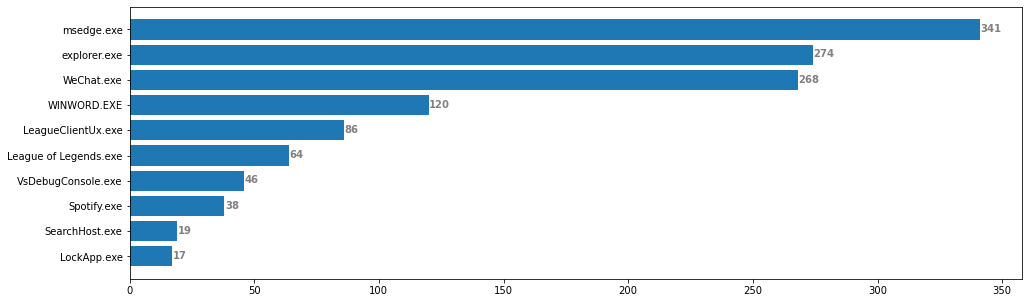

In [327]:
fig, ax = plt.subplots(figsize =(16, 5))
ax.barh(app, count)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

HMM

In [328]:
app_name = [x[0] for x in ranking]
app_encode = []
for i in range(len(apps)):
    curr = list(apps["VALUE"])[i]
    app_encode.append(app_name.index(curr))
app_encode

[6,
 4,
 0,
 4,
 8,
 7,
 4,
 0,
 5,
 0,
 5,
 0,
 2,
 0,
 4,
 7,
 15,
 7,
 1,
 8,
 7,
 2,
 0,
 2,
 0,
 7,
 2,
 7,
 2,
 0,
 2,
 1,
 0,
 7,
 2,
 7,
 1,
 11,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 3,
 2,
 3,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 8,
 9,
 8,
 0,
 2,
 0,
 2,
 0,
 2,
 9,
 2,
 0,
 6,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 9,
 0,
 2,
 0,
 1,
 19,
 0,
 6,
 6,
 2,
 6,
 4,
 1,
 0,
 4,
 1,
 5,
 1,
 4,
 1,
 5,
 1,
 4,
 1,
 5,
 1,
 4,
 1,
 5,
 1,
 4,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 5,
 0,
 5,
 0,
 5,
 0,
 4,
 0,
 2,
 0,
 2,
 0,
 10,
 0,
 26,
 0,
 2,
 0,
 14,
 0,
 6,
 4,
 1,
 5,
 1,
 4,
 1,
 5,
 1,
 4,
 1,
 5,
 1,
 4,
 1,
 5,
 1,
 4,
 1,
 5,
 1,
 4,
 1,
 5,
 1,
 4,
 1,
 5,
 1,
 4,
 1,
 5,
 1,
 4,
 1,
 5,
 1,
 4,
 1,
 5,
 4,
 1,
 5,
 4,
 1,
 5,
 4,
 1,
 2,
 11,
 9,
 6,
 1,
 4,
 5,
 4,
 1,
 5,
 1,
 4,
 1,
 5,
 1,
 4,
 1,
 5,
 1,
 4,
 1,
 5,
 1,
 4,
 1,
 5,
 16,
 6,
 16,
 6,
 7,
 5,
 7,
 4,
 1,
 2,
 4,

In [329]:
def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

In [330]:
matrix_value = transition_matrix(app_encode)
matrix_value

[[0.0,
  0.28152492668621704,
  0.41642228739002934,
  0.12903225806451613,
  0.017595307917888565,
  0.017595307917888565,
  0.03225806451612903,
  0.011730205278592375,
  0.020527859237536656,
  0.017595307917888565,
  0.02932551319648094,
  0.0,
  0.0,
  0.0,
  0.017595307917888565,
  0.002932551319648094,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.002932551319648094,
  0.002932551319648094,
  0.0,
  0.0],
 [0.22992700729927007,
  0.0072992700729927005,
  0.22992700729927007,
  0.16058394160583941,
  0.11313868613138686,
  0.10948905109489052,
  0.032846715328467155,
  0.010948905109489052,
  0.010948905109489052,
  0.021897810218978103,
  0.0,
  0.0072992700729927005,
  0.0036496350364963502,
  0.010948905109489052,
  0.0,
  0.0036496350364963502,
  0.0072992700729927005,
  0.010948905109489052,
  0.0,
  0.0036496350364963502,
  0.0072992700729927005,
  0.0036496350364963502,
  0.0,
  0.0,
  0.0036496350364963502,
  0.0072992700729927005,
  0.0,
  0.0

In [331]:
matrix_dic = dict(zip(app_name, matrix_value))
matrix_dic

{'msedge.exe': [0.0,
  0.28152492668621704,
  0.41642228739002934,
  0.12903225806451613,
  0.017595307917888565,
  0.017595307917888565,
  0.03225806451612903,
  0.011730205278592375,
  0.020527859237536656,
  0.017595307917888565,
  0.02932551319648094,
  0.0,
  0.0,
  0.0,
  0.017595307917888565,
  0.002932551319648094,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.002932551319648094,
  0.002932551319648094,
  0.0,
  0.0],
 'explorer.exe': [0.22992700729927007,
  0.0072992700729927005,
  0.22992700729927007,
  0.16058394160583941,
  0.11313868613138686,
  0.10948905109489052,
  0.032846715328467155,
  0.010948905109489052,
  0.010948905109489052,
  0.021897810218978103,
  0.0,
  0.0072992700729927005,
  0.0036496350364963502,
  0.010948905109489052,
  0.0,
  0.0036496350364963502,
  0.0072992700729927005,
  0.010948905109489052,
  0.0,
  0.0036496350364963502,
  0.0072992700729927005,
  0.0036496350364963502,
  0.0,
  0.0,
  0.0036496350364963502,
  0.007

In [332]:
def hmm_classifier(start_app):
    probs = matrix_dic[start_app]
    return app_name[probs.index(max(probs))]

In [333]:
hmm_classifier("Discord.exe")

'explorer.exe'

In [334]:
hmm_classifier("msedge.exe")

'WeChat.exe'

In [335]:
apps["NEXT"] = apps["VALUE"].shift(-1)
apps

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA,NEXT
1,2022-12-08 06:23:06.681,3,VsDebugConsole.exe,0,LeagueClientUx.exe
5,2022-12-08 06:23:12.697,3,LeagueClientUx.exe,0,msedge.exe
9,2022-12-08 06:23:21.730,3,msedge.exe,0,LeagueClientUx.exe
13,2022-12-08 06:23:27.732,3,LeagueClientUx.exe,0,SearchHost.exe
17,2022-12-08 06:23:45.790,3,SearchHost.exe,0,Spotify.exe
...,...,...,...,...,...
5408,2023-01-18 05:39:50.351,2,LockApp.exe,0,SearchHost.exe
5412,2023-01-18 05:39:53.360,2,SearchHost.exe,0,msedge.exe
5416,2023-01-18 05:39:56.360,2,msedge.exe,0,explorer.exe
5420,2023-01-18 05:43:41.946,2,explorer.exe,0,VsDebugConsole.exe


In [336]:
app_name

['msedge.exe',
 'explorer.exe',
 'WeChat.exe',
 'WINWORD.EXE',
 'LeagueClientUx.exe',
 'League of Legends.exe',
 'VsDebugConsole.exe',
 'Spotify.exe',
 'SearchHost.exe',
 'LockApp.exe',
 'Zoom.exe',
 'Razer Synapse Service Process.exe',
 'NeedForSpeedHeat.exe',
 'steam.exe',
 'ShellExperienceHost.exe',
 'devenv.exe',
 'DB Browser for SQLite.exe',
 'LeagueClient.exe',
 'Cyberpunk2077.exe',
 'Teams.exe',
 'StartMenuExperienceHost.exe',
 'Discord.exe',
 'Origin.exe',
 'steamwebhelper.exe',
 'REDlauncher.exe',
 'RiotClientUx.exe',
 'OpenWith.exe',
 'MoNotificationUx.exe',
 'rundll32.exe',
 'WechatBrowser.exe']

In [337]:
list(apps[apps["VALUE"] == 'msedge.exe']["NEXT"])

['LeagueClientUx.exe',
 'League of Legends.exe',
 'League of Legends.exe',
 'WeChat.exe',
 'LeagueClientUx.exe',
 'WeChat.exe',
 'Spotify.exe',
 'WeChat.exe',
 'Spotify.exe',
 'WeChat.exe',
 'explorer.exe',
 'WeChat.exe',
 'WeChat.exe',
 'WeChat.exe',
 'WeChat.exe',
 'WeChat.exe',
 'WeChat.exe',
 'WeChat.exe',
 'WeChat.exe',
 'WeChat.exe',
 'WeChat.exe',
 'VsDebugConsole.exe',
 'WeChat.exe',
 'WeChat.exe',
 'explorer.exe',
 'explorer.exe',
 'WeChat.exe',
 'WeChat.exe',
 'explorer.exe',
 'WeChat.exe',
 'WeChat.exe',
 'explorer.exe',
 'WeChat.exe',
 'explorer.exe',
 'WeChat.exe',
 'WeChat.exe',
 'LockApp.exe',
 'WeChat.exe',
 'explorer.exe',
 'VsDebugConsole.exe',
 'LeagueClientUx.exe',
 'explorer.exe',
 'WeChat.exe',
 'League of Legends.exe',
 'League of Legends.exe',
 'League of Legends.exe',
 'LeagueClientUx.exe',
 'WeChat.exe',
 'WeChat.exe',
 'Zoom.exe',
 'OpenWith.exe',
 'WeChat.exe',
 'ShellExperienceHost.exe',
 'VsDebugConsole.exe',
 'explorer.exe',
 'SearchHost.exe',
 'WeChat.ex

In [338]:
results = []
for i in range(len(app_name)):
    nexts = list(apps[apps["VALUE"] == app_name[i]]["NEXT"])
    counts = []
    for j in range(len(app_name)):
        counts.append(nexts.count(app_name[j]))
    probs = np.array(counts)/sum(counts)
    results.append(probs)
    

In [339]:
results

[array([0.        , 0.28152493, 0.41642229, 0.12903226, 0.01759531,
        0.01759531, 0.03225806, 0.01173021, 0.02052786, 0.01759531,
        0.02932551, 0.        , 0.        , 0.        , 0.01759531,
        0.00293255, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00293255, 0.00293255, 0.        , 0.        ]),
 array([0.22992701, 0.00729927, 0.22992701, 0.16058394, 0.11313869,
        0.10948905, 0.03284672, 0.01094891, 0.01094891, 0.02189781,
        0.        , 0.00729927, 0.00364964, 0.01094891, 0.        ,
        0.00364964, 0.00729927, 0.01094891, 0.        , 0.00364964,
        0.00729927, 0.00364964, 0.        , 0.        , 0.00364964,
        0.00729927, 0.        , 0.        , 0.        , 0.00364964]),
 array([0.62686567, 0.13059701, 0.        , 0.09701493, 0.05597015,
        0.02985075, 0.01119403, 0.00746269, 0.00373134, 0.00746269,
        0.00373134, 0.00746269, 0.        , 

Foreground Duration Data Preparation

In [340]:
apps

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA,NEXT
1,2022-12-08 06:23:06.681,3,VsDebugConsole.exe,0,LeagueClientUx.exe
5,2022-12-08 06:23:12.697,3,LeagueClientUx.exe,0,msedge.exe
9,2022-12-08 06:23:21.730,3,msedge.exe,0,LeagueClientUx.exe
13,2022-12-08 06:23:27.732,3,LeagueClientUx.exe,0,SearchHost.exe
17,2022-12-08 06:23:45.790,3,SearchHost.exe,0,Spotify.exe
...,...,...,...,...,...
5408,2023-01-18 05:39:50.351,2,LockApp.exe,0,SearchHost.exe
5412,2023-01-18 05:39:53.360,2,SearchHost.exe,0,msedge.exe
5416,2023-01-18 05:39:56.360,2,msedge.exe,0,explorer.exe
5420,2023-01-18 05:43:41.946,2,explorer.exe,0,VsDebugConsole.exe


In [341]:
time = pd.to_datetime(apps.MEASUREMENT_TIME)
time

1      2022-12-08 06:23:06.681
5      2022-12-08 06:23:12.697
9      2022-12-08 06:23:21.730
13     2022-12-08 06:23:27.732
17     2022-12-08 06:23:45.790
                 ...          
5408   2023-01-18 05:39:50.351
5412   2023-01-18 05:39:53.360
5416   2023-01-18 05:39:56.360
5420   2023-01-18 05:43:41.946
5424   2023-01-18 05:43:44.950
Name: MEASUREMENT_TIME, Length: 1359, dtype: datetime64[ns]

In [342]:
duration = []
for i in range(len(time) -1 ):
    duration.append(time.iloc[i+1] - time.iloc[i])
duration = [float(i.total_seconds()) for i in duration]

In [343]:
apps = apps.iloc[:-1]
apps['DURATION'] = duration
apps = apps.drop(columns=['ID_INPUT', 'PRIVATE_DATA'])


<ipython-input-343-14c5a34363f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps['DURATION'] = duration


In [344]:
apps

,MEASUREMENT_TIME,VALUE,NEXT,DURATION
1,2022-12-08 06:23:06.681,VsDebugConsole.exe,LeagueClientUx.exe,6.016
5,2022-12-08 06:23:12.697,LeagueClientUx.exe,msedge.exe,9.033
9,2022-12-08 06:23:21.730,msedge.exe,LeagueClientUx.exe,6.002
13,2022-12-08 06:23:27.732,LeagueClientUx.exe,SearchHost.exe,18.058
17,2022-12-08 06:23:45.790,SearchHost.exe,Spotify.exe,3.003
...,...,...,...,...
5404,2023-01-18 00:39:55.857,msedge.exe,LockApp.exe,17994.494
5408,2023-01-18 05:39:50.351,LockApp.exe,SearchHost.exe,3.009
5412,2023-01-18 05:39:53.360,SearchHost.exe,msedge.exe,3.000
5416,2023-01-18 05:39:56.360,msedge.exe,explorer.exe,225.586


In [407]:
app_duration = apps.groupby('VALUE').sum().sort_values('DURATION',ascending= False)
app_duration

,DURATION
VALUE,
VsDebugConsole.exe,1983041.917
msedge.exe,551192.189
LeagueClientUx.exe,259186.071
StartMenuExperienceHost.exe,158078.982
explorer.exe,156065.303
Razer Synapse Service Process.exe,120528.899
LockApp.exe,88857.110
WeChat.exe,78910.332
League of Legends.exe,54573.308


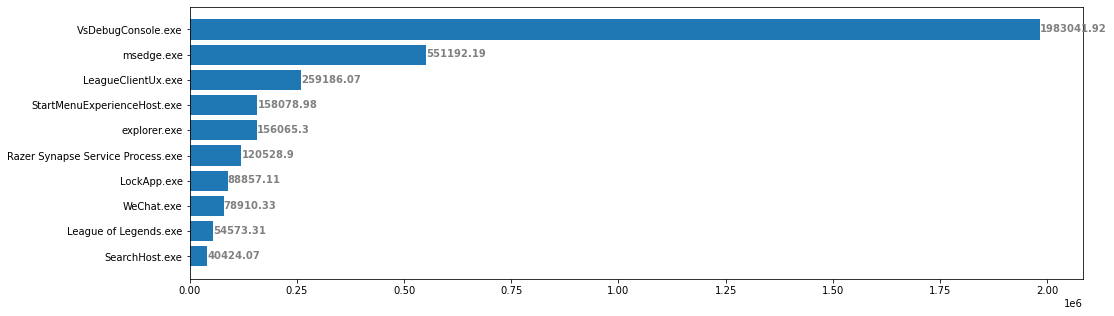

In [353]:
temp = app_duration[:10]
name = list(temp.index)
duration_time = list(temp['DURATION'])
fig, ax = plt.subplots(figsize =(16, 5))
ax.barh(name, duration_time)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

LSTM Time Series Forecasting

In [432]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [37]:
apps['MEASUREMENT_TIME'] = time

<ipython-input-37-49316e015ff6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps['MEASUREMENT_TIME'] = time


In [370]:
apps

,MEASUREMENT_TIME,VALUE,NEXT,DURATION
1,2022-12-08 06:23:06.681,VsDebugConsole.exe,LeagueClientUx.exe,6.016
5,2022-12-08 06:23:12.697,LeagueClientUx.exe,msedge.exe,9.033
9,2022-12-08 06:23:21.730,msedge.exe,LeagueClientUx.exe,6.002
13,2022-12-08 06:23:27.732,LeagueClientUx.exe,SearchHost.exe,18.058
17,2022-12-08 06:23:45.790,SearchHost.exe,Spotify.exe,3.003
...,...,...,...,...
5404,2023-01-18 00:39:55.857,msedge.exe,LockApp.exe,17994.494
5408,2023-01-18 05:39:50.351,LockApp.exe,SearchHost.exe,3.009
5412,2023-01-18 05:39:53.360,SearchHost.exe,msedge.exe,3.000
5416,2023-01-18 05:39:56.360,msedge.exe,explorer.exe,225.586


In [377]:
apps['MEASUREMENT_TIME'][1].hour

6

In [426]:
# ohe = OneHotEncoder()
# transformed = ohe.fit_transform(np.array(apps['VALUE']).reshape(-1, 1))
# transformed = transformed.toarray()
# transformed


1359

In [431]:
feature = pd.DataFrame()
feature['time_diff_seconds'] = apps['DURATION']
feature['ts_hour'] = [i.hour for i in apps['MEASUREMENT_TIME']]
feature['ts_minutes'] = [i.minute for i in apps['MEASUREMENT_TIME']]
feature['day'] = [i.day for i in apps['MEASUREMENT_TIME']]
feature['month'] = [i.month for i in apps['MEASUREMENT_TIME']]
feature['app_encoded'] = app_encode[:-1]
feature


,time_diff_seconds,ts_hour,ts_minutes,day,month,app_encoded
1,6.016,6,23,8,12,6
5,9.033,6,23,8,12,4
9,6.002,6,23,8,12,0
13,18.058,6,23,8,12,4
17,3.003,6,23,8,12,8
...,...,...,...,...,...,...
5404,17994.494,0,39,18,1,0
5408,3.009,5,39,18,1,9
5412,3.000,5,39,18,1,8
5416,225.586,5,39,18,1,0


In [467]:
num_feat = ['time_diff_seconds','ts_hour', 'ts_minutes','day','month']
cat_feat = ['app_encoded']

preproc = ColumnTransformer(transformers=[('num', MinMaxScaler(feature_range=(0,1)), num_feat), ('cat', OneHotEncoder(), cat_feat)])

dataset_lstm_scaled = np.reshape(preproc.fit_transform(feature), (-1,1))
dataset_lstm_scaled


<47530x1 sparse matrix of type '<class 'numpy.float64'>'
	with 7340 stored elements in COOrdinate format>

In [468]:
values = feature.values
dataset_lstm = np.reshape(values, (-1,1))


In [470]:
sc = MinMaxScaler(feature_range=(0,1))
dataset_lstm_scaled = sc.fit_transform(dataset_lstm)
dataset_lstm_scaled

array([[3.93627037e-06],
       [3.92580157e-06],
       [1.50489060e-05],
       ...,
       [1.17774047e-05],
       [6.54300261e-07],
       [6.54300261e-07]])

In [471]:
def create_dataset(dataset, look_back):
    X,Y = [], []
    for i in range(len(dataset) - look_back -1):
        a = dataset[i:(i+look_back),0]
        X.append(a)
        Y.append(dataset[i + look_back,0])
    return np.array(X), np.array(Y)


In [472]:
train_size = int(len(dataset_lstm_scaled)* 0.8)
test_size = len(dataset_lstm_scaled) - train_size
train, test = dataset_lstm_scaled[:train_size,:], dataset_lstm_scaled[train_size:len(dataset_lstm_scaled),:]

look_back = 5
X_train_lstm, Y_train_lstm = create_dataset(train, look_back)
X_test_lstm, Y_test_lstm = create_dataset(test, look_back)

X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], 1, X_train_lstm.shape[1]))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], 1, X_test_lstm.shape[1]))

In [135]:
# def df_to_X_y(df, window_size = 10):
#     df_as_np = df.to_numpy()
#     X=[]
#     y=[]
#     for i in range(len(df_as_np) - window_size):
#         row = [[a] for a in df_as_np[i:i+window_size]]
#         X.append(row)
#         label = df_as_np[i+window_size]
#         y.append(label)
#     return np.array(X), np.array(y)

In [367]:
# X, y = df_to_X_y(feature['duration'])
# train_size = int(len(feature)* 0.8)
# test_size = len(feature) - train_size
# X_train, y_train = X[:train_size], y[:train_size]
# X_test, y_test = X[train_size:len(feature)], y[train_size:len(feature)]


Build a model

In [389]:
model = Sequential()


model.add(LSTM(units = 5, return_sequences=True,input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 10, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 3, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 10))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 1, 5)              220       
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 5)              0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 1, 10)             640       
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 1, 3)              168       
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 3)              0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 10)              

In [394]:
history = model.fit(X_train_lstm, Y_train_lstm, epochs=30, batch_size=10, validation_data=(X_test_lstm, Y_test_lstm), callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose = 1, shuffle = False)

Epoch 1/30
543/543 [==============================] - 5s 8ms/step - loss: 2.0036e-04 - val_loss: 2.8934e-05
Epoch 2/30
543/543 [==============================] - 3s 6ms/step - loss: 2.0027e-04 - val_loss: 2.8938e-05
Epoch 3/30
543/543 [==============================] - 4s 8ms/step - loss: 2.0026e-04 - val_loss: 2.8936e-05
Epoch 4/30
543/543 [==============================] - 4s 8ms/step - loss: 2.0026e-04 - val_loss: 2.8930e-05
Epoch 5/30
543/543 [==============================] - 5s 9ms/step - loss: 2.0027e-04 - val_loss: 2.8939e-05
Epoch 6/30
543/543 [==============================] - 4s 8ms/step - loss: 2.0028e-04 - val_loss: 2.8931e-05
Epoch 7/30
543/543 [==============================] - 6s 10ms/step - loss: 2.0035e-04 - val_loss: 2.8932e-05
Epoch 8/30
543/543 [==============================] - 6s 11ms/step - loss: 2.0029e-04 - val_loss: 2.8935e-05
Epoch 9/30
543/543 [==============================] - 6s 10ms/step - loss: 2.0030e-04 - val_loss: 2.8939e-05
Epoch 10/30
543/543 [====

<function matplotlib.pyplot.show(*args, **kw)>

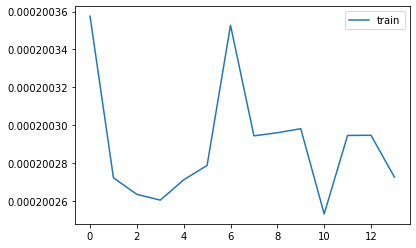

In [396]:
plt.plot(history.history['loss'], label = 'train')
#plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

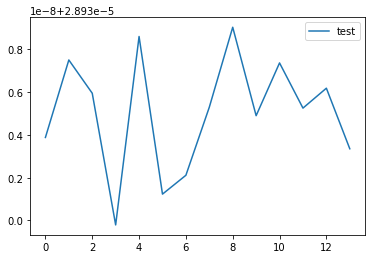

In [398]:
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show

Visualization

<ipython-input-365-40222e863150>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fgnd_df_app['mov_avg'] =  fgnd_df_app['DURATION'].rolling(3).mean()
<ipython-input-365-40222e863150>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fgnd_df_app['exp_mov_avg'] = fgnd_df_app['DURATION'].ewm(alpha=0.001).mean()


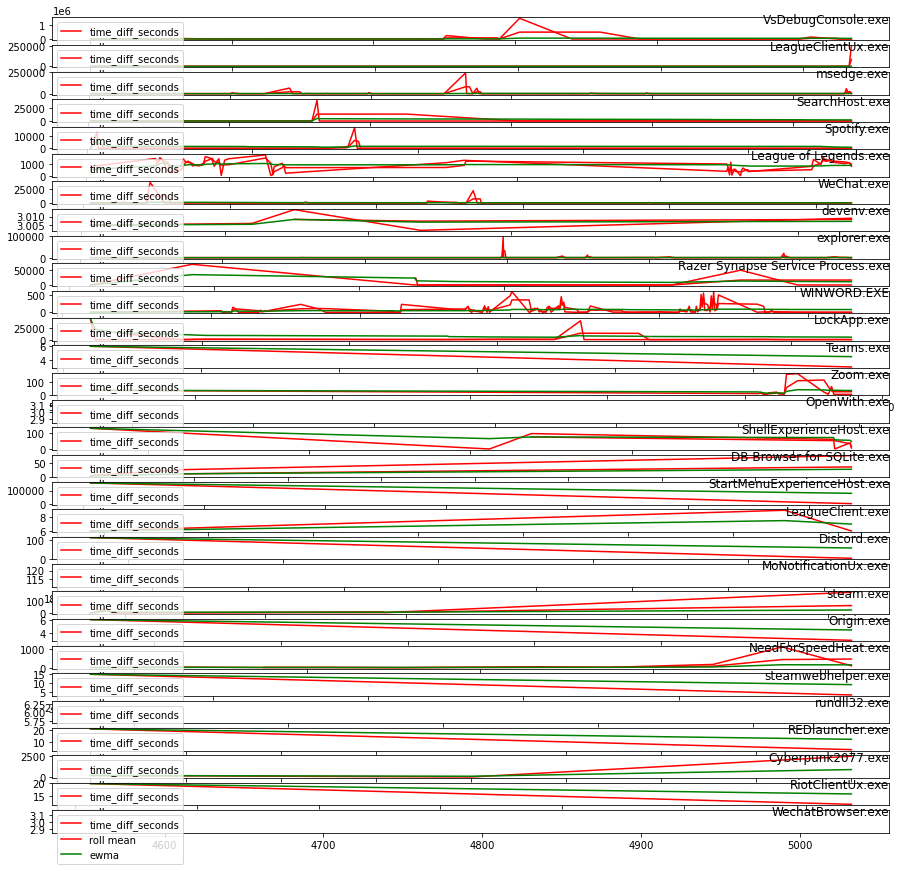

In [365]:
#The Daily foreground duration per app with moving avg& exp moving avg
i = 1
plt.figure(figsize=(15,15))
for j in apps['VALUE'].unique():
    plt.subplot(len(apps['VALUE'].unique()),1,i)
    fgnd_df_app = apps.loc[apps['VALUE'] == j]
    fgnd_df_app['mov_avg'] =  fgnd_df_app['DURATION'].rolling(3).mean()
    fgnd_df_app['exp_mov_avg'] = fgnd_df_app['DURATION'].ewm(alpha=0.001).mean()
    
    plt.plot(fgnd_df_app['DURATION'], label = 'time_diff_seconds', color ='r')
    plt.plot(fgnd_df_app['mov_avg'], label='roll mean', color='r')
    plt.plot(fgnd_df_app['exp_mov_avg'], label = 'ewma', color = 'g')
    plt.legend(loc=2)
    plt.title(j,y=0.5,loc='right')
    i +=1
plt.show()